## Introduction to Noise




<image>
<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/f/f4/Noise_salt_and_pepper.png"/>
<Figcaption>Figure 1: Noisy Image (Source:wikipedia)</Figcaption>
</center>
</image>


Noise is a grainy film in a photograph, hiding details and making the picture look considerably worse. Images can be so noisy in some situations that they are unusable. Technically, there will always be some amount of noise in any picture. There is nothing to keep this from happening; it is a physical property of light and photography. It is a degradation in the image caused by external interference. 



## Sources of Image noise


### Insufficient Light Level introduces Noise in an Image






<image>
<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/3/3b/Noise_Comparison.JPG"/>
<Figcaption>Figure 2: Image with sufficient light and insufficient light Source:wikipedia(CC BY-SA 2.5)</Figcaption>
</center>
</image>


Let’s look at some instances where we notice the noise. Figure 2: contains two images. One is taken in low light with an exposure time greater than ten. The image is noisy. It is shown on the left side.

If we take a photograph of the same image with adequate light with 0.1 seconds of light exposure,
it will look like a figure on the right side. The image is less noisy.

Therefore The lighting level in the image might also introduce noise in the image.



### Images are corrupted during transmission



Images are corrupted during transmission principally by interference in the transmission. One of the most common noise types which corrupt images during transmission are impulse noise, also known as salt & pepper noise, as shown in the figure.


<image>
<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/f/f4/Noise_salt_and_pepper.png"/>
<Figcaption>Figure 3: Image with salt and pepper noise</Figcaption>
</center>
</image>


## Models of Noise based on nature


Based on the nature of noise, there are two types of noise: 
1. Additive noise
2. Multiplicative noise


### Additive noise

$$g(x,y) = f(x, y) + \eta(x,y)$$

In additive noise, noise is added to the original Image. One typical exmaple of addivive noise is Gaussian noise.


#### Gaussian noise


Gaussian noise is the statistical noise having a probability distribution function equal to Gaussian distribution or normal distribution.
The PDF of a Gaussian random variable Z is given by 


$$
    p(z) = \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(z - \bar{z})^2}{2\sigma^2}}, - \infty < z < \infty
$$


where,

* $\text{z}$ represents intensity,
* $\bar{z}$ is the mean (average) value of $\text{z}$ ,
* $σ$ is the standard deviation.



Gaussian noise is the most commonly used noise model in image processing because it effectively describes the most random noise encountered in the image-processing pipeline. This type of noise is also known as additive noise.
Gaussian noise is caused by natural sources such as the thermal vibration of atoms and the discrete nature of warm objects' radiation.



##### Gaussian Filters


Gaussian filters are used to remove Gaussian noise. Here, we will apply the Gaussian filter to the image with Gaussian noise. First, let's introduce Gaussian noise.



In [1]:
import random
import cv2
import matplotlib.pyplot as plt
import numpy as np

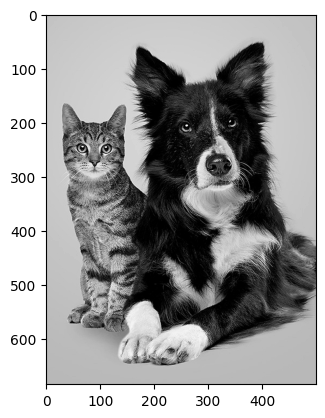

In [2]:
image = cv2.imread('cat_dog.jpg', 0)
plt.imshow(image, cmap='gray')

Let's define mean and variance for normal distribution.


In [3]:
mean = 0
variance = 10

Let's generate the gaussian noise.


In [4]:
noise = np.random.normal(mean, variance ** 0.5, image.shape)

In [5]:
noise.shape

(685, 500)

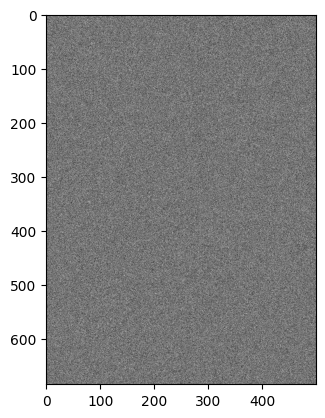

In [6]:
plt.imshow(noise, cmap='gray')

Since gaussian noise is additive noise let's add it to image.


In [7]:
image = np.asarray(image, np.float64)
noisy_image = cv2.add(image, noise, dtype=cv2.CV_64F)

Let's normalize the image.


In [8]:
cv2.normalize(noisy_image, noisy_image, 0, 255, cv2.NORM_MINMAX, dtype=-1)
noisy_image = noisy_image.astype(np.uint8)

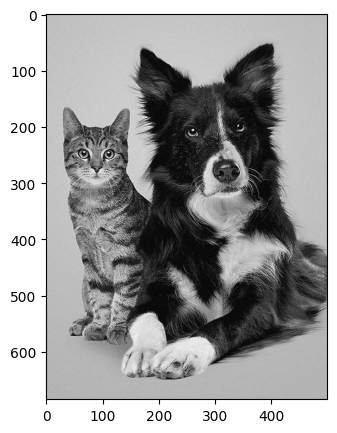

In [9]:
plt.figure(figsize=(5,5))
plt.imshow(noisy_image, cmap='gray')

Let's visualize the output in image patch.


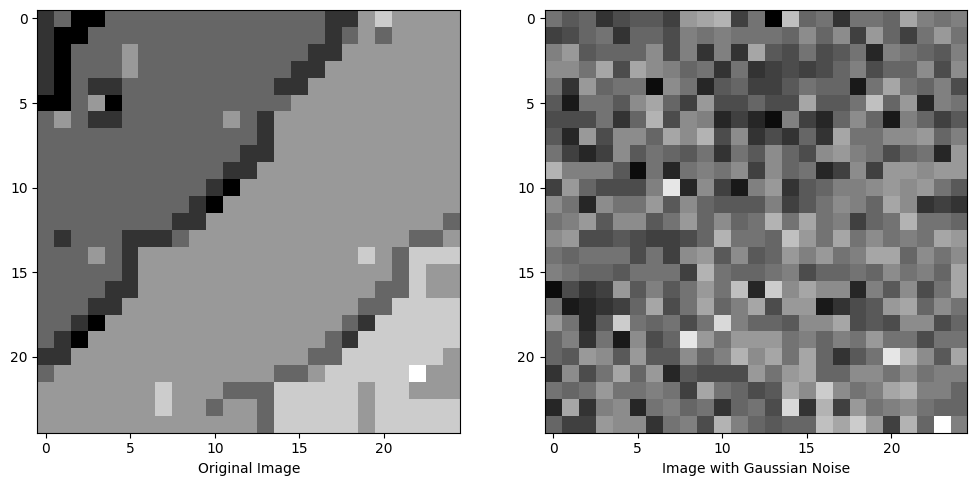

In [10]:
#@title compare
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(image[50:75, 50:75], cmap='gray')
axes[0].set_xlabel('Original Image')
plt.savefig('cliporgi.jpg')

axes[1].imshow(noisy_image[50:75, 50:75], cmap='gray')
axes[1].set_xlabel('Image with Gaussian Noise')
plt.savefig("cliporgi_spnoise_add.jpg")
plt.show()
plt.close()

You can use gaussian filter to remove this kind of noise.


#### Denoising


An image may contain noise. Reducing noise in an image is a primary goal in Image processing. It produces meaningful Information. Reducing noise from an Image is called denoising. In denoising, loss of original features should be minimum.
Denoising could inevitably lose some details. 


In [11]:
gaussian_blurred = cv2.GaussianBlur(image, (5,5), 0)

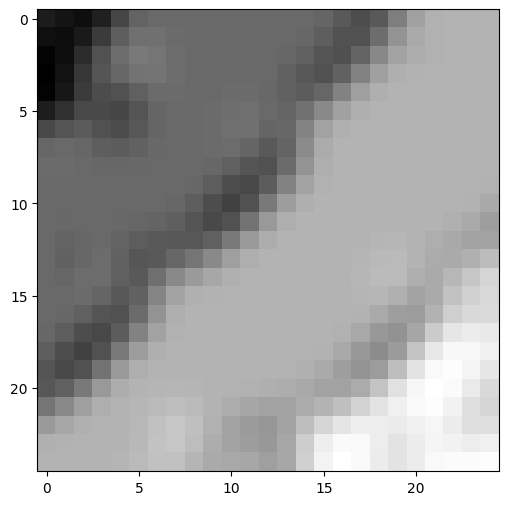

In [12]:
plt.figure(figsize=(8, 6))
plt.imshow(gaussian_blurred[50:75, 50:75], cmap='gray')

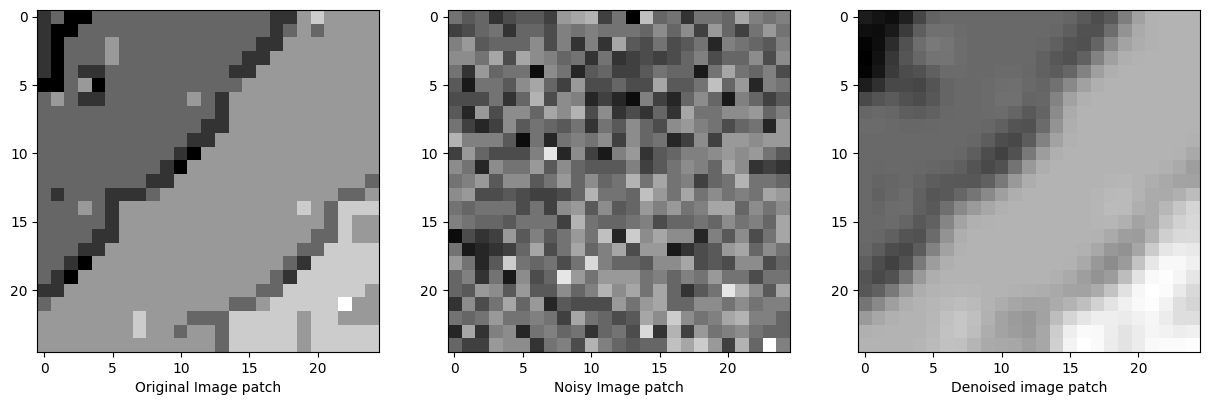

In [13]:
#Compare Image patch, Noised patch and denoised patch
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
axes[0].imshow(image[50:75, 50:75], cmap='gray')
axes[0].set_xlabel('Original Image patch')
axes[1].imshow(noisy_image[50:75, 50:75], cmap='gray')
axes[1].set_xlabel('Noisy Image patch')
axes[2].imshow(gaussian_blurred[50:75, 50:75], cmap='gray')
axes[2].set_xlabel('Denoised image patch')
plt.show()
plt.close()


 Despite knowing the type of noise, it is hard to extract the original image completely.


### Multiplicative noise




$$g(x,y) = f(x, y) . \eta(x,y)$$

In Multiplicative noise, noise multiplies to the original Image. One typical exmaple of Multiplicative noise is Speckle noise.


 If we multiply the image with Gaussian noise, we will get multiplicative noise so called speckle noise.


In [14]:
image = cv2.imread('cat_dog.jpg', 0)
mean = 0
var = 0.02
noise = np.random.normal(mean, var ** 0.5,image.shape)
speckle_out = image + image * noise

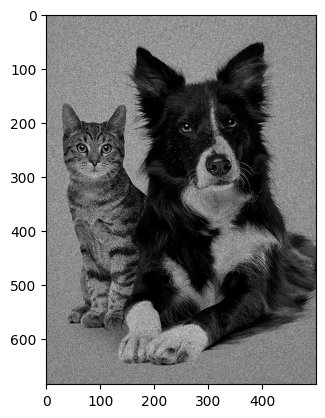

In [15]:
plt.imshow(speckle_out, cmap='gray')

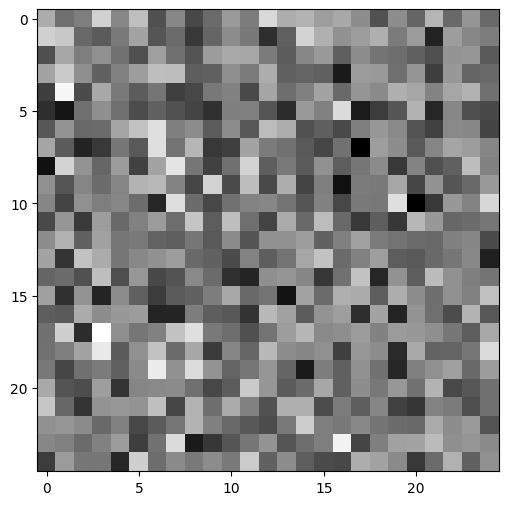

In [16]:
plt.figure(figsize=(8, 6))
plt.imshow(speckle_out[50:75, 50:75], cmap='gray')

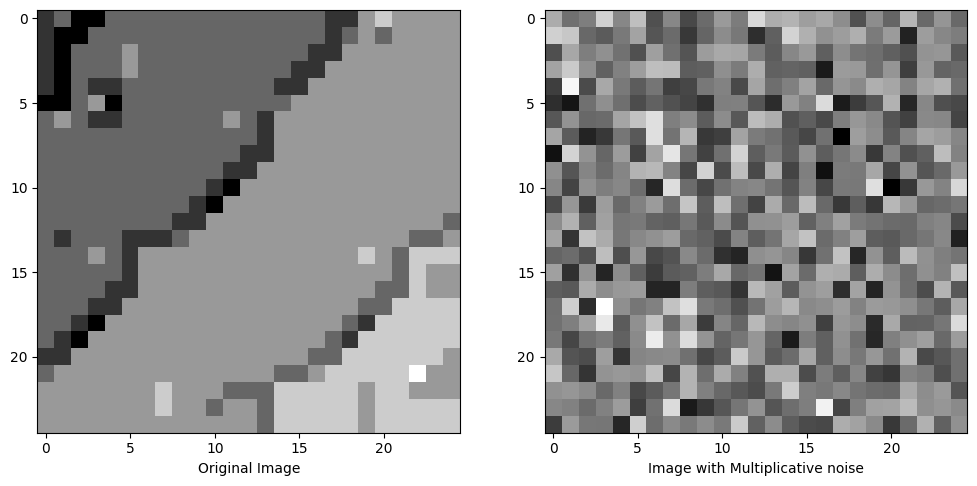

In [17]:
#Compare Image with and without Multiplicative noise
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(image[50:75, 50:75], cmap='gray')
axes[0].set_xlabel('Original Image')
# plt.savefig('cliporgi.png')

axes[1].imshow(speckle_out[50:75, 50:75], cmap='gray')
axes[1].set_xlabel('Image with Multiplicative noise')
# plt.savefig("cliporgi spnoise add.png")
plt.show()
plt.close()

## Salt and Pepper Noise


Impulse noise also is known as Salt and Pepper noise.

Causes of salt and pepper noise:

* The defect of the camera sensor, 
* Device software or hardware failure,
* Transmission error etc.


In the Salt & Pepper noise model, only a proportion of all the image pixels are corrupted, while other pixels are non-noisy.

A standard Salt & Pepper noise value may be either black (0) or white (255). The typical intensity value for pepper
noise is close to 0, and for salt noise  is close to 255.




$$
    \eta(i,j)= 
\begin{cases}
    0,& \text{Pepper Noise }\\
    255,              & \text{Salt Noise}
\end{cases}
\
$$



<image>
<center>



<p>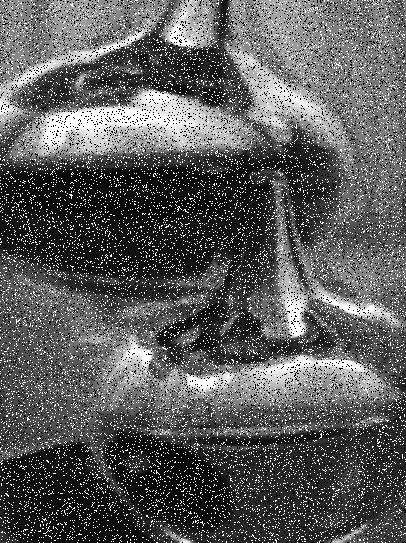</p>
<Figcaption>Figure 4: Image with Salt and Pepper Noise</Figcaption>

</center>
</image>


In [18]:
import random
import numpy as np
import matplotlib.pyplot as plt
import cv2

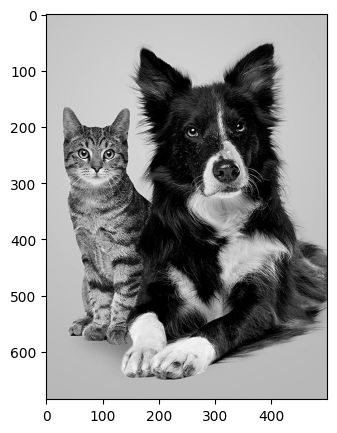

In [19]:
image = cv2.imread('cat_dog.jpg',0)
plt.figure (figsize=(10,5))
fig = plt.imshow(image, cmap='gray')

This is a clean image with no noise. 

In this section, You will:


__1. Introduce salt and pepper noise in this image__

__2. Explore how salt and pepper noise looks like.__

__3. Clean the image with salt and pepper noise, and display the results(Denoising).__


In [20]:
np.random.seed(1)
prob = 0.1 
output = np.zeros(image.shape,np.uint8)
thres = 1 - prob 
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        rdn = random.random()
        if rdn < prob: # if random number is less than prob given put 0(pepper noise) intensity in an image 
            output[i][j] = 0
        elif rdn > thres: # if random number is greater than thrshold than add white (salt noise)
            output[i][j] = 255

Why `prob = 0.1? `
* It is arbitary number dont use too low and dont use too high (0-0.9]

Note:
* `thres` gives threshold for salt noise. 


Display Salt and Pepper Noise.


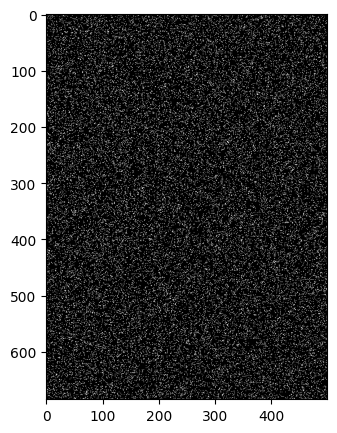

In [21]:
plt.figure (figsize=(5,5))
plt.imshow(output, cmap='gray')

This is what salt and pepper noise looks like. Let's first explore pixel distribution of this noise Image.


In [22]:
output[:7,:7]

array([[255,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 255,   0],
       [  0,   0,   0, 255,   0,   0,   0],
       [255,   0,   0,   0, 255,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 255,   0,   0,   0,   0]], dtype=uint8)

Here `0` represents pepper Noise and `255` represents salt noise.
 Let's Introduce this Noise in Our original Image.


In [23]:
def salt_and_pepper_noise_image(image,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob: 
                output[i][j] = 0
            elif rdn > thres: 
                output[i][j] = 255
            else: 
                output[i][j] = image[i][j] 
    return output

Notice the difference in Previous code and this code. In this code, if the random number generated is less than `prob` and higher than `thres` assign the value of `MIN and MAX` respectively. 

If `thres == 1 - prob` and other conditions if satisfied, then the pixels are unaltered.
The modified image has black and white dots sprayed over the image.




In [24]:
image_with_s_p_noise = salt_and_pepper_noise_image(image,prob)

Display Image after salt and Pepper noise Introduction.


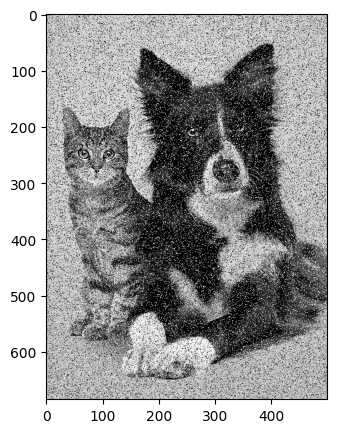

In [25]:
plt.figure (figsize=(5,5))
plt.imshow(image_with_s_p_noise,cmap='gray')

Let's see what happened to pixels after noise Introduction.


In [26]:
image_with_s_p_noise[:7,:7]

array([[  0,   0, 193, 195, 195, 195, 195],
       [193, 193, 195, 195, 255, 195, 255],
       [  0, 255,   0, 195, 195,   0, 195],
       [255, 195, 195, 195,   0, 195, 195],
       [195, 195, 195, 195, 195, 255, 194],
       [255, 195, 195, 196, 195, 194, 255],
       [195, 195, 195, 195, 194, 194,   0]], dtype=uint8)

`0 and 255` is introduced in an image.Let's compare this with original image initial 5 * 5 pixel intensities.


In [27]:
image[:7,:7]

array([[194, 193, 193, 195, 195, 195, 195],
       [193, 193, 195, 195, 195, 195, 194],
       [193, 195, 196, 195, 195, 195, 195],
       [195, 195, 195, 195, 195, 195, 195],
       [195, 195, 195, 195, 195, 195, 194],
       [195, 195, 195, 196, 195, 194, 194],
       [195, 195, 195, 195, 194, 194, 196]], dtype=uint8)

Let's look at a different patch of the image.


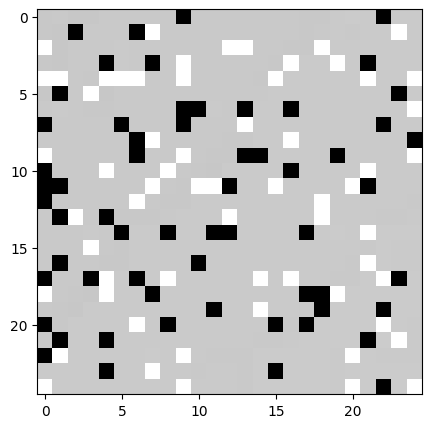

In [28]:
plt.figure(figsize = (5,5))
plt.imshow(image_with_s_p_noise[50:75, 50:75], cmap='gray')

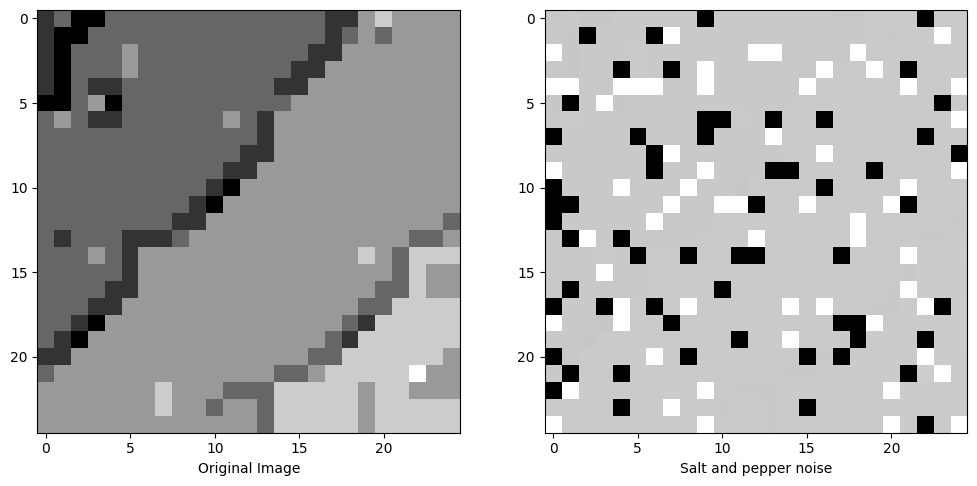

In [29]:

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(image[50:75, 50:75], cmap='gray')
axes[0].set_xlabel('Original Image')
# plt.savefig('cliporgi.png')

axes[1].imshow(image_with_s_p_noise[50:75, 50:75], cmap='gray')
axes[1].set_xlabel('Salt and pepper noise')
# plt.savefig("cliporgi spnoise add.png")
plt.show()
plt.close()

In the above figure we can see how the patch of the original image (left) is changed by the introduciton of salt and pepper noise (right). The pixel values change, which effect the next algorithms that we apply during image processing pipeline.



**Denoising Salt and pepper Noise**


Let's use box filter to denoise the salt and pepper noise


In [30]:
box_blurred = cv2.blur(image_with_s_p_noise, (5,5))

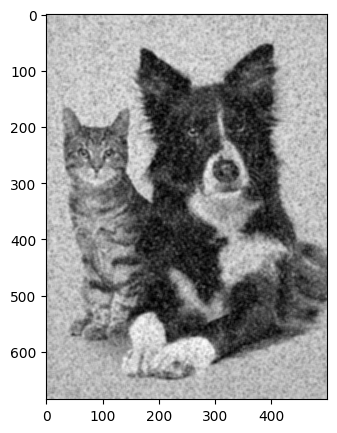

In [31]:
plt.figure(figsize = (5,5))
plt.imshow(box_blurred, cmap='gray')

Let's see the image patch.


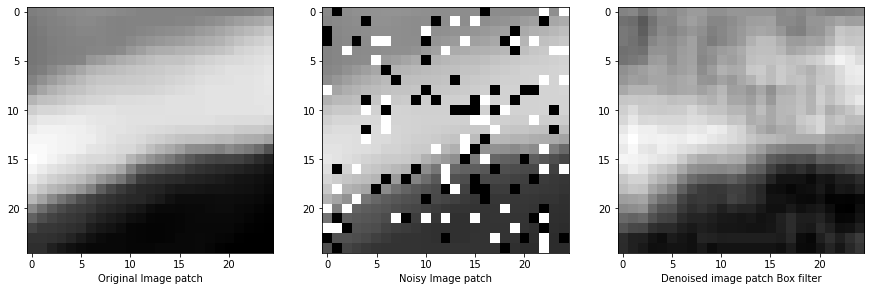

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
axes[0].imshow(image[50:75, 50:75], cmap='gray')
axes[0].set_xlabel('Original Image patch')
axes[1].imshow(image_with_s_p_noise[50:75, 50:75], cmap='gray')
axes[1].set_xlabel('Noisy Image patch')
axes[2].imshow(box_blurred[50:75, 50:75], cmap='gray')
axes[2].set_xlabel('Denoised image patch Box filter')
plt.show()
plt.close()

Box filter didnot remove the noise. Let's try the Gaussian filter.


In [32]:
gaussian_blurred_sp = cv2.GaussianBlur(image_with_s_p_noise,(11,11),0)

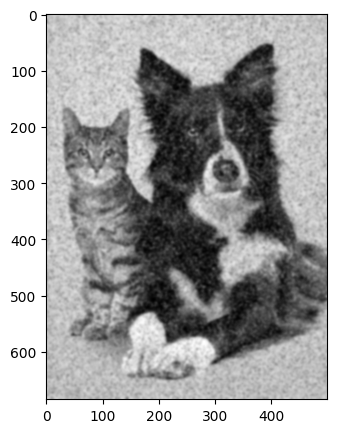

In [33]:
plt.figure(figsize = (5,5))
plt.imshow(gaussian_blurred_sp, cmap='gray')

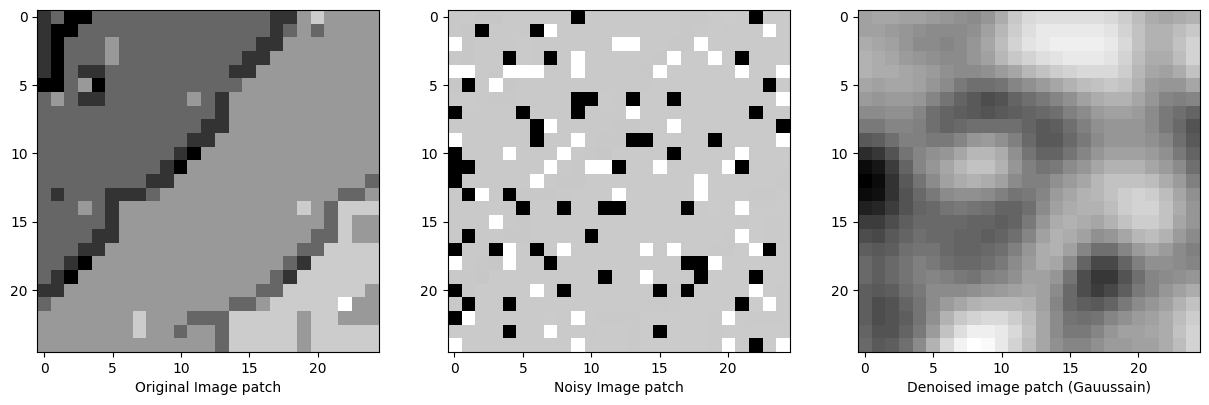

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
axes[0].imshow(image[50:75, 50:75], cmap='gray')
axes[0].set_xlabel('Original Image patch')
axes[1].imshow(image_with_s_p_noise[50:75, 50:75], cmap='gray')
axes[1].set_xlabel('Noisy Image patch')
axes[2].imshow(gaussian_blurred_sp[50:75, 50:75], cmap='gray')
axes[2].set_xlabel('Denoised image patch (Gauussain)')
plt.show()
plt.close()

Gaussian blur also didn't remove the salt and pepper noise. Let's discuss the problems with these linear averaging filters.


Box filter is the linear averaging filter. The output pixel value is the weighted average of neighborhood pixel values at that position. The box filter smooths the Image but cannot remove the salt and pepper noise because the extreme values 0 or 255 in salt and pepper noise in the image window also participate in filtering. The box filter also dissolves the fine details of the Image.  Our goal is to pick salt and pepper noise and remove them selectively. Therefore, we need a non-linear statistical filter independent of the pixel value that preserves the Image's edges and removes salt and pepper noise.  The simplest one is a median filter.





#### Median filter


The median filter is nonlinear. The median filter is handy in removing impulse noise, i.e.,  "salt and pepper" noise. 

__Principle:__

Instead of using mean operation, remove each pixel's gray level by the median of the grayscale in the neighborhood of pixels.

You will get details of the median filter in the next chapter `Gaussian Smoothing and median filters.` This section will only discuss the application of the median filter on salt and pepper noise.




<image>
<center>



<p>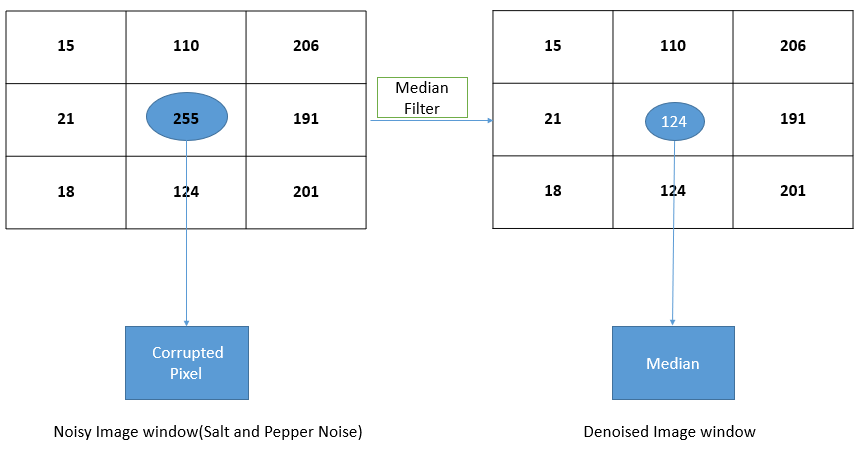</p>
<Figcaption>Figure 5: Median Filter</Figcaption>

</center>
</image>


In the above figure, A corrupted pixel of an image window is 255. In denoising operation, the median filter replaces 255 with a median value of 124 of the noisy image window.


_The key downside of standard Median Filter is that it is only efficient at low densities of noise. The edge information of the original picture will not be preserved by the regular median filter when the noise level reaches 50 percent._


## Key Takeaways


* Noise is a grainy film in a photograph, hiding details in an image, making the image look considerably worse. 
* Insufficient light level, interference in the transmission channel, and sensor issues are some causes of the Image noise.
*In additive noise, noise is added to the original image, whereas multiplicative noise multiplies on the original image.

* Gaussian filter removes gaussian noise however fails to remove salt and pepper noise.

* The median filter is nonlinear. The median filter is handy in removing impulse noise, i.e., "salt and pepper" noise. 

* There is no straightforward way to detect noise in the image. If we do not know the nature of the noise, it is challenging to denoise the image. Therefore image denoising is a problematic and challenging problem in image processing.
